In [1]:
# Import the machine learning libraries.
import bs4 as bs
import urllib.request
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')
import heapq

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
# Install BeautifulSoup 4.
pip install beautifulsoup4

In [3]:
# Install lxml.
pip install lxml

In [0]:
# Get the data source from the Wikipedia.
source = urllib.request.urlopen('https://en.wikipedia.org/wiki/Coronavirus_disease_2019').read()

In [0]:
# Parse the data and create BeautifulSoup object.
soup = bs.BeautifulSoup(source,'lxml')

In [6]:
soup.prettify()

'<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   Coronavirus disease 2019 - Wikipedia\n  </title>\n  <script>\n   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"Xp4KPQpAMNcAAVagmA0AAABJ","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Coronavirus_disease_2019","wgTitle":"Coronavirus disease 2019","wgCurRevisionId":952153188,"wgRevisionId":952153188,"wgArticleId":63030231,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 Korean-language sources (ko)","CS1 Chinese-language sources (zh)","All articles with dead external links","Articles 

In [0]:
# Fetch the data.
text = ""
for paragraph in soup.find_all('p'):
    text += paragraph.text

In [8]:
print(text)


Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2).[8] The disease was first identified in December 2019 in Wuhan, the capital of China's Hubei province, and has since spread globally, resulting in the ongoing 2019–20 coronavirus pandemic.[9][10] Common symptoms include fever, cough, and shortness of breath.[5] Other symptoms may include fatigue, muscle pain, diarrhoea, sore throat, loss of smell, and abdominal pain.[5][11][12] The time from exposure to onset of symptoms is typically around five days but may range from two to fourteen days.[5][13] While the majority of cases result in mild symptoms, some progress to viral pneumonia and multi-organ failure.[9][14] As of 20 April 2020,[update] more than 2.45 million cases have been reported across 185 countries and territories,[15] resulting in more than 168,000 deaths. More than 643,000 people have recovered.[7]
The virus is primarily spread between people

In [0]:
# Preprocess the data.
text = re.sub(r'\[[0-9]*\]',' ',text)
text = re.sub(r'\s+',' ',text)
clean_text = text.lower()
clean_text = re.sub(r'\W',' ',clean_text)
clean_text = re.sub(r'\d',' ',clean_text)
clean_text = re.sub(r'\s+',' ',clean_text)

In [10]:
print(clean_text)

 coronavirus disease covid is an infectious disease caused by severe acute respiratory syndrome coronavirus sars cov the disease was first identified in december in wuhan the capital of china s hubei province and has since spread globally resulting in the ongoing coronavirus pandemic common symptoms include fever cough and shortness of breath other symptoms may include fatigue muscle pain diarrhoea sore throat loss of smell and abdominal pain the time from exposure to onset of symptoms is typically around five days but may range from two to fourteen days while the majority of cases result in mild symptoms some progress to viral pneumonia and multi organ failure as of april update more than million cases have been reported across countries and territories resulting in more than deaths more than people have recovered the virus is primarily spread between people during close contact a often via small droplets produced by coughing b sneezing or talking while these droplets are produced whe

<function matplotlib.pyplot.show>

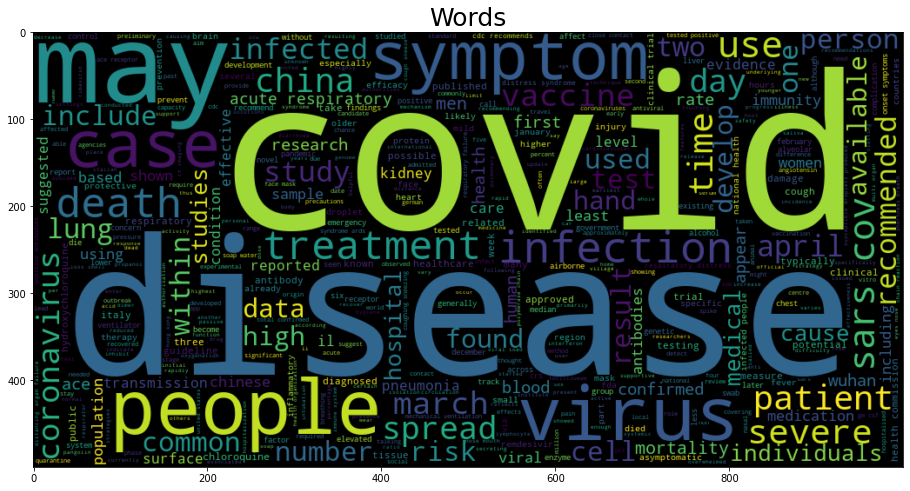

In [11]:
# Word cloud for the cleaned text.
plt.figure(figsize=(16,8))
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5)
wc_clean_text = WC.generate(clean_text)
plt.imshow(wc_clean_text, interpolation='bilinear')
plt.title('Words', fontsize=25)
plt.show

In [0]:
# Tokenize sentences.
sentences = nltk.sent_tokenize(text)

In [13]:
print(sentences)

[' Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2).', "The disease was first identified in December 2019 in Wuhan, the capital of China's Hubei province, and has since spread globally, resulting in the ongoing 2019–20 coronavirus pandemic.", 'Common symptoms include fever, cough, and shortness of breath.', 'Other symptoms may include fatigue, muscle pain, diarrhoea, sore throat, loss of smell, and abdominal pain.', 'The time from exposure to onset of symptoms is typically around five days but may range from two to fourteen days.', 'While the majority of cases result in mild symptoms, some progress to viral pneumonia and multi-organ failure.', 'As of 20 April 2020,[update] more than 2.45 million cases have been reported across 185 countries and territories, resulting in more than 168,000 deaths.', 'More than 643,000 people have recovered.', 'The virus is primarily spread between people during close conta

In [0]:
# Stopword list.
stop_words = nltk.corpus.stopwords.words('english')

In [0]:
# Word counts.
word2count = {}
for word in nltk.word_tokenize(clean_text):
    if word not in stop_words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [0]:
# Convert counts to weights.
max_count = max(word2count.values())
for key in word2count.keys():
    word2count[key] = word2count[key]/max_count

In [0]:
# Product sentence scores.
sent2score = {}
for sentence in sentences:
    for word in nltk.word_tokenize(sentence.lower()):
        if word in word2count.keys():
            if len(sentence.split(' ')) < 25:
                if sentence not in sent2score.keys():
                    sent2score[sentence] = word2count[word]
                else:
                    sent2score[sentence] += word2count[word]

In [0]:
# Get the optimal 3 lines.
n_sentences = 3
best_sentences = heapq.nlargest(n_sentences, sent2score, key=sent2score.get)

In [19]:
# Print 3 sentences.
for sentence in best_sentences:
    print(sentence, sep = "\n")

The virus is most contagious when people are symptomatic; while spread may be possible before symptoms emerge, the risk is low.
Acute cardiac injury was found in 12% of infected people admitted in hospital in Wuhan, China, and is more frequent in severe disease.
 Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2).
